**Start with the following code from the last lab session**

 Simple image classification using CIFAR10, also provided by Keras

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
frog


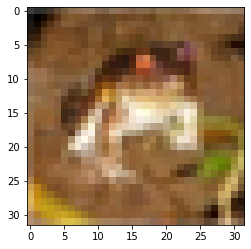

In [2]:
# Starts with imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# Loading dataset 
# It is important to normalise the data
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
# Getting to know the data
# 50000 training images, 32*32*3 (RGB 3 channels)
# 10000 test images
# airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.
print(x_train.shape)
print(x_test.shape)
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# show an image
plt.imshow(x_train[0, ])
print(class_names[y_train[0][0]])
plt.show()

In [3]:
# Classification with a neural network with fully connected layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(x_test, y_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 6s 136us/sample - loss: 1.9067 - acc: 0.3129 - val_loss: 2.2582 - val_acc: 0.1864
Epoch 2/30
45000/45000 [==============================] - 4s 100us/sample - loss: 1.7033 - acc: 0.3918 - val_loss: 1.6994 - val_acc: 0.3806
Epoch 3/30
45000/45000 [==============================] - 5s 102us/sample - loss: 1.6155 - acc: 0.4233 - val_loss: 1.7334 - val_acc: 0.3700
Epoch 4/30
45000/45000 [==============================] - 5s 105us/sample - loss: 1.5544 - acc: 0.4476 - val_loss: 1.6524 - val_acc: 0.4028
Epoch 5/30
45000/45000 [==============================] - 4s 100us/sample - loss: 1.5064 - acc: 0.4603 - val_loss: 1.5463 - val_acc: 0.4432
Epoch 6/30
45000/45000 [==============================] - 5s 106us/sample - loss: 1.4665 - acc: 0.4762 - val_loss: 1.5799 - val_acc: 0.4436
Epoch 7/30
45000/45000 [======

[1.6202913093566895, 0.4813]

**Task 1**: Add early stopping to this. Train for up to 60 epochs, and store the model with the best performance (on the validation set)

In [4]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/60
45000/45000 [==============================] - 5s 112us/sample - loss: 1.9194 - acc: 0.3058 - val_loss: 1.9814 - val_acc: 0.2672
Epoch 2/60
45000/45000 [==============================] - 5s 107us/sample - loss: 1.7158 - acc: 0.3864 - val_loss: 1.7415 - val_acc: 0.3692
Epoch 3/60
45000/45000 [==============================] - 5s 103us/sample - loss: 1.6246 - acc: 0.4189 - val_loss: 1.5846 - val_acc: 0.4372
Epoch 4/60
45000/45000 [==============================] - 5s 105us/sample - loss: 1.5601 - acc: 0.4431 - val_loss: 1.7913 - val_acc: 0.3404
Epoch 5/60
45000/45000 [==============================] - 5s 109us/sample - loss: 1.5150 - acc: 0.4557 - val_loss: 1.5847 - val_acc: 0.4280
Epoch 6/60
45000/45000 [==============================] - 5s 104us/sample - loss: 1.4711 - acc: 0.4754 - val_loss: 1.5341 - val_acc: 0.4542
Epoch 7/60
45000/45000 [==============================] - 5s 106us/sample - loss: 1.4357 - acc: 0.4865 - val_lo

[1.4229907257080079, 0.4982]

**Task 2**: Add a Dropout layer after each layer (apart from the output layer), with dropout rate set to 0.2. 

Adjust the dropout rate and the dropout layers used and see how affects the performance.

In [5]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300, activation="relu"))   
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/60
45000/45000 [==============================] - 6s 125us/sample - loss: 2.1091 - acc: 0.2119 - val_loss: 1.9475 - val_acc: 0.2828
Epoch 2/60
45000/45000 [==============================] - 6s 124us/sample - loss: 1.9246 - acc: 0.2989 - val_loss: 1.8401 - val_acc: 0.3370
Epoch 3/60
45000/45000 [==============================] - 6s 126us/sample - loss: 1.8587 - acc: 0.3264 - val_loss: 1.7630 - val_acc: 0.3696
Epoch 4/60
45000/45000 [==============================] - 6s 125us/sample - loss: 1.8100 - acc: 0.3444 - val_loss: 1.7450 - val_acc: 0.3752
Epoch 5/60
45000/45000 [==============================] - 6s 125us/sample - loss: 1.7761 - acc: 0.3569 - val_loss: 1.7045 - val_acc: 0.3874
Epoch 6/60
45000/45000 [==============================] - 6s 124us/sample - loss: 1.7485 - acc: 0.3715 - val_loss: 1.6719 - val_acc: 0.4022
Epoch 7/60
45000/45000 [==============================] - 6s 125us/sample - loss: 1.7198 - acc: 0.3838 - val_lo

[1.3061614967346191, 0.5361]

**Task 3**: Build a Convolutional Neural Network using an architecture similar to the example shown in the lecture demo

Explore different combinations of kernel sizes, and conv/pooling layers.

In [6]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
history = model.fit(x_train, y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test, y_test)

Train on 45000 samples, validate on 5000 samples
Epoch 1/60
45000/45000 [==============================] - 20s 442us/sample - loss: 2.2212 - acc: 0.1587 - val_loss: 2.0323 - val_acc: 0.2682
Epoch 2/60
45000/45000 [==============================] - 15s 332us/sample - loss: 2.0108 - acc: 0.2522 - val_loss: 1.8393 - val_acc: 0.3224
Epoch 3/60
45000/45000 [==============================] - 15s 335us/sample - loss: 1.8433 - acc: 0.3129 - val_loss: 1.6761 - val_acc: 0.3914
Epoch 4/60
45000/45000 [==============================] - 15s 336us/sample - loss: 1.7144 - acc: 0.3674 - val_loss: 1.6448 - val_acc: 0.4162
Epoch 5/60
45000/45000 [==============================] - 15s 332us/sample - loss: 1.6169 - acc: 0.4103 - val_loss: 1.4272 - val_acc: 0.4840
Epoch 6/60
45000/45000 [==============================] - 15s 332us/sample - loss: 1.5460 - acc: 0.4392 - val_loss: 1.3410 - val_acc: 0.5082
Epoch 7/60
45000/45000 [==============================] - 15s 335us/sample - loss: 1.4779 - acc: 0.4704 -

[0.8709915576934815, 0.7027]